In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier
from sklearn.model_selection import train_test_split #Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
#loading dataset
dataset = pd.read_csv("Churn_Modeling.csv")
# Check is the data is properly loaded
dataset.head()

In [ ]:
X = dataset.iloc[:,3:13].values
X
y = dataset.iloc[:,13].values
y

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#The functionality of LableEncoder has been transferred to the variable labelencoder
labelencoder = LabelEncoder()
#Here we have applied the function fit_transform on the second column of the data
#What does fit_transform do? Transform the Gender Data by fitting it on the labelencoder
X[:,2] = labelencoder.fit_transform(X[:,2])
# The next step is to label encode the geography
X[:,1] = labelencoder.fit_transform(X[:,1])
X

In [ ]:
from sklearn.compose import ColumnTransformer
#Name, fucntion, Column Number
#Purpose of name is for coder to understand which column is being transformed
ct = ColumnTransformer([("Country",OneHotEncoder(),[1])], remainder = 'passthrough')
X = ct.fit_transform(X)
X

In [ ]:
#Create the Pandas DataFrame
X = pd.DataFrame(X, columns=["X1","X2","X3", "Credit Score", "Gender", "Age", "Tenure", "Balance", "NumOfProducts",	"HasCrCard",	"IsActiveMember",	"EstimatedSalary"])
X.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

In [ ]:
clf = DecisionTreeClassifier(max_depth=6)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.866


In [ ]:
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


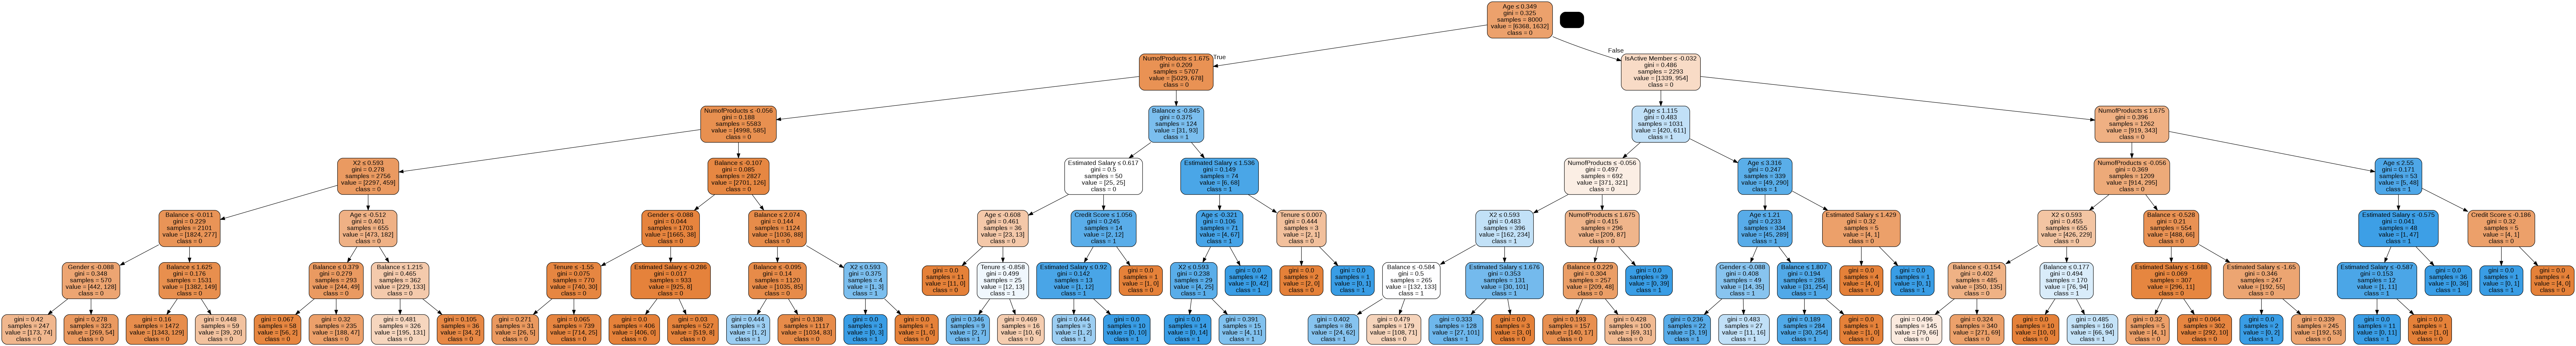

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
feature_cols = ["X1", "X2", "X3", "Credit Score", "Gender", "Age","Tenure", "Balance", "NumofProducts", "HasCrCard", "IsActive Member", "Estimated Salary"]
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('creditmodel.png')
Image(graph.create_png())

Accuracy: 0.866


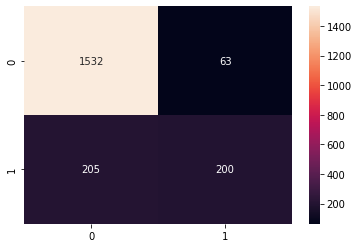

In [ ]:
import seaborn as sns
from sklearn import metrics
#Predicting the test set results
#determining if the value is less or more than cutoff
y_pred = clf.predict(X_test)
y_pred = (y_pred >0.47)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True, fmt = '');